In [38]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import pandas as pd
from matplotlib import ticker
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)
matplotlib.rcParams['figure.figsize'] = (10, 8)

RELOAD = True

In [39]:
if RELOAD:
    from importlib import reload
    try:
        reload(recopilar_data)
    except NameError:
        import recopilar_data
    

data_raw = pd.read_csv('alldata.dat', sep='\s+')

data_raw.head(10)

,densidad,temperatura,job,potencial_mean,potencial_2,cinetica_mean,cinetica_2,total_mean,total_2,presion_mean,presion_2
0,0.673,0.9,2,-4.049032,16.397296,1.350362,1.829471,-2.698670,7.291019,0.067955,0.053698
1,0.673,0.9,3,-4.053090,16.430562,1.349925,1.829053,-2.703165,7.317021,0.059607,0.057676
2,0.673,0.9,5,-4.056525,16.458077,1.344077,1.812593,-2.712447,7.366198,0.058617,0.051638
3,0.673,0.9,4,-4.053202,16.431074,1.349013,1.826428,-2.704189,7.321760,0.047876,0.049721
4,0.673,0.9,1,-4.056272,16.456140,1.347836,1.822921,-2.708436,7.344802,0.047001,0.056005
5,0.673,0.9,6,-4.046613,16.377880,1.361537,1.860936,-2.685076,7.219681,0.073275,0.057734
6,0.673,2.0,2,-3.442984,11.864294,2.995798,9.007328,-0.447186,0.244117,3.090401,9.709422
7,0.673,2.0,3,-3.446020,11.885144,2.994838,8.998520,-0.451182,0.245527,3.066846,9.559726
8,0.673,2.0,5,-3.446223,11.886530,2.981756,8.920435,-0.464468,0.255326,3.065842,9.543643
9,0.673,2.0,4,-3.445070,11.878228,3.005042,9.059560,-0.440028,0.229204,3.061663,9.529493


In [40]:
data = data_raw.groupby(['densidad','temperatura'], as_index=False).mean().drop('job', axis=1)
names = ['potencial', 'cinetica', 'total', 'presion']
for name in names:
    data[name+'_std'] = np.sqrt( data[name+'_2'] - data[name+'_mean']**2 )

data.head()

,densidad,temperatura,potencial_mean,potencial_2,cinetica_mean,cinetica_2,total_mean,total_2,presion_mean,presion_2,potencial_std,cinetica_std,total_std,presion_std
0,0.001,0.9,-0.008677,0.000104,1.347354,1.821406,1.338676,1.798116,0.000895,8.010361e-07,0.005341,0.077745,0.077851,0.000014
1,0.001,1.1,-0.007527,0.000082,1.650930,2.734960,1.643402,2.710211,0.001096,1.201800e-06,0.005031,0.096907,0.097159,0.000015
2,0.001,2.0,-0.005644,0.000054,2.996150,9.006941,2.990506,8.973161,0.001999,3.994450e-06,0.004679,0.173275,0.173303,0.000020
3,0.010,0.9,-0.086384,0.007761,1.349034,1.825885,1.262650,1.600492,0.008554,7.340165e-05,0.017291,0.077409,0.078778,0.000472
4,0.010,1.1,-0.073463,0.005651,1.649711,2.730530,1.576249,2.493772,0.010642,1.135095e-04,0.015935,0.094773,0.095977,0.000500


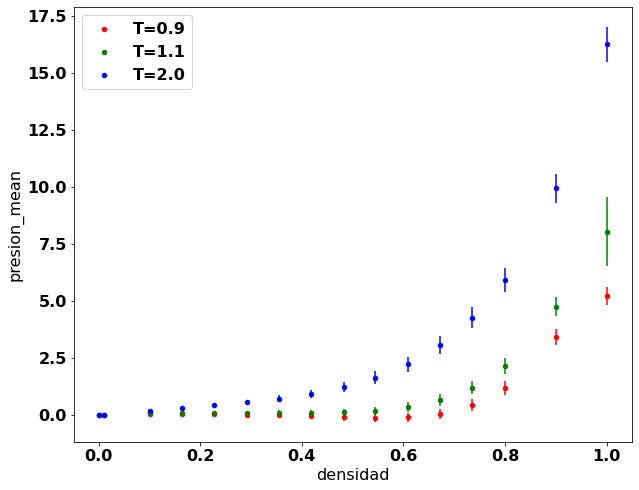

In [41]:
fig, ax = plt.subplots()

temps = [0.9, 1.1, 2.0]
colors = 'rgb'

for temp, color in zip(temps, colors): #data['temperatura'].unique():
    data2 = data[data['temperatura']==temp]
    data2.plot(
        'densidad', 'presion_mean', yerr='presion_std', color=color,
        kind='scatter', label=f'T={temp}', ax=ax
        )

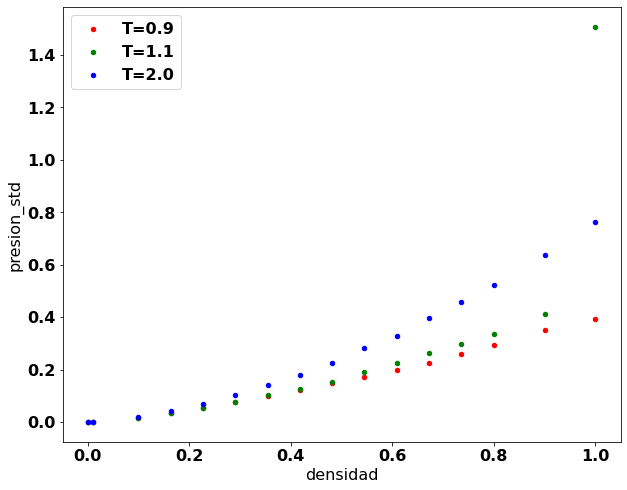

In [42]:
fig, ax = plt.subplots()

temps = [0.9, 1.1, 2.0]
colors = 'rgb'

for temp, color in zip(temps, colors): #data['temperatura'].unique():
    data2 = data[data['temperatura']==temp]
    data2.plot(
        'densidad', 'presion_std', color=color,
        kind='scatter', label=f'T={temp}', ax=ax
        )

(0.6, 1.5)

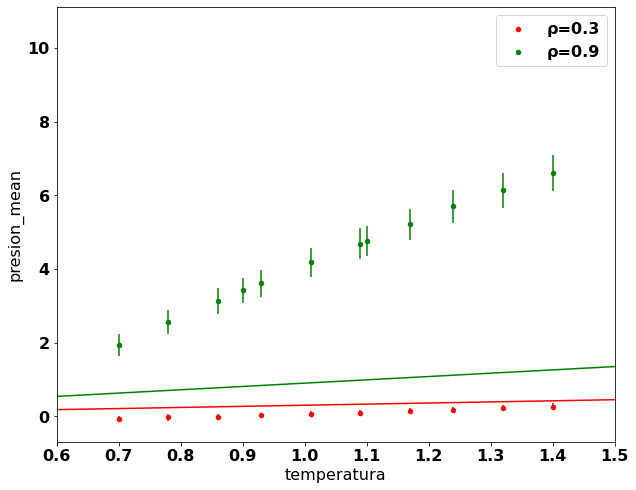

In [43]:
fig, ax = plt.subplots()

denss = [0.3, 0.9]
colors = 'rgb'

x = np.array([0.6, 1.5])

for dens, color in zip(denss, colors): #data['temperatura'].unique():
    data3 = data[data['densidad']==dens]
    data3.plot(
        'temperatura', 'presion_mean', yerr='presion_std', color=color,
        kind='scatter', label=f'ρ={dens}', ax=ax
        )
    ax.plot(x, dens*x, color=color)

ax.set_xlim(x)

In [47]:
data_raw[(data_raw['densidad']== 1.0) & (data_raw['temperatura']==1.10)]

,temperatura,job,potencial_mean,potencial_2,cinetica_mean,cinetica_2,total_mean,total_2,presion_mean,presion_2
densidad,,,,,,,,,,
0.001,18,18,18,18,18,18,18,18,18,18
0.010,18,18,18,18,18,18,18,18,18,18
0.100,18,18,18,18,18,18,18,18,18,18
0.164,18,18,18,18,18,18,18,18,18,18
0.227,18,18,18,18,18,18,18,18,18,18
0.291,18,18,18,18,18,18,18,18,18,18
0.300,33,33,33,33,33,33,33,33,33,33
0.355,18,18,18,18,18,18,18,18,18,18
0.418,18,18,18,18,18,18,18,18,18,18
